# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 570


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
units = "imperial"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port macquarie
Processing Record 2 of Set 1 | uturoa
Processing Record 3 of Set 1 | narasannapeta
Processing Record 4 of Set 1 | kununurra
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | rikaze
Processing Record 7 of Set 1 | klyuchi
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | port lincoln
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | tocopilla
Processing Record 15 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 16 of Set 1 | ust'-ordynskiy
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | tralee
Processing Record 20 of Set 1 | olonkinbyen
Processing Record 21 of Set 1 | wailua homesteads
Processing 

Processing Record 38 of Set 4 | saldanha
Processing Record 39 of Set 4 | longyearbyen
Processing Record 40 of Set 4 | akureyri
Processing Record 41 of Set 4 | zeya
Processing Record 42 of Set 4 | khash
Processing Record 43 of Set 4 | qaqortoq
Processing Record 44 of Set 4 | malango
Processing Record 45 of Set 4 | nar'yan-mar
Processing Record 46 of Set 4 | la foa
Processing Record 47 of Set 4 | bikin
Processing Record 48 of Set 4 | neryungri
Processing Record 49 of Set 4 | stanley
Processing Record 0 of Set 5 | lompoc
Processing Record 1 of Set 5 | hithadhoo
Processing Record 2 of Set 5 | cromer
Processing Record 3 of Set 5 | vanimo
Processing Record 4 of Set 5 | hailar
Processing Record 5 of Set 5 | fangshan
Processing Record 6 of Set 5 | kegeyli shahar
Processing Record 7 of Set 5 | cahors
Processing Record 8 of Set 5 | petropavlovsk-kamchatsky
Processing Record 9 of Set 5 | puerto aysen
Processing Record 10 of Set 5 | graaff-reinet
Processing Record 11 of Set 5 | tarauaca
Processing

Processing Record 31 of Set 8 | manokwari
Processing Record 32 of Set 8 | las palmas
Processing Record 33 of Set 8 | hihifo
City not found. Skipping...
Processing Record 34 of Set 8 | taoudenni
Processing Record 35 of Set 8 | istgah-e rah ahan-e garmsar
Processing Record 36 of Set 8 | bakchar
Processing Record 37 of Set 8 | garbahaarrey
Processing Record 38 of Set 8 | pathein
Processing Record 39 of Set 8 | emet
Processing Record 40 of Set 8 | scarborough
Processing Record 41 of Set 8 | bhuj
Processing Record 42 of Set 8 | ghanzi
Processing Record 43 of Set 8 | langarud
Processing Record 44 of Set 8 | khandyga
Processing Record 45 of Set 8 | kargopol'
Processing Record 46 of Set 8 | syktyvkar
Processing Record 47 of Set 8 | belomorsk
Processing Record 48 of Set 8 | rosarito
Processing Record 49 of Set 8 | laguna
Processing Record 0 of Set 9 | isoka
Processing Record 1 of Set 9 | anchau
Processing Record 2 of Set 9 | sodra sandby
Processing Record 3 of Set 9 | mbanza-ngungu
Processing R

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port macquarie,-31.4333,152.9167,74.89,87,97,8.39,AU,1706545844
1,uturoa,-16.7333,-151.4333,82.78,76,92,3.06,PF,1706545844
2,narasannapeta,18.4167,84.0500,69.71,71,41,1.61,IN,1706545845
3,kununurra,-15.7667,128.7333,82.38,83,79,0.00,AU,1706545845
4,new norfolk,-42.7826,147.0587,51.71,97,9,2.98,AU,1706545845


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port macquarie,-31.4333,152.9167,74.89,87,97,8.39,AU,1706545844
1,uturoa,-16.7333,-151.4333,82.78,76,92,3.06,PF,1706545844
2,narasannapeta,18.4167,84.0500,69.71,71,41,1.61,IN,1706545845
3,kununurra,-15.7667,128.7333,82.38,83,79,0.00,AU,1706545845
4,new norfolk,-42.7826,147.0587,51.71,97,9,2.98,AU,1706545845


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

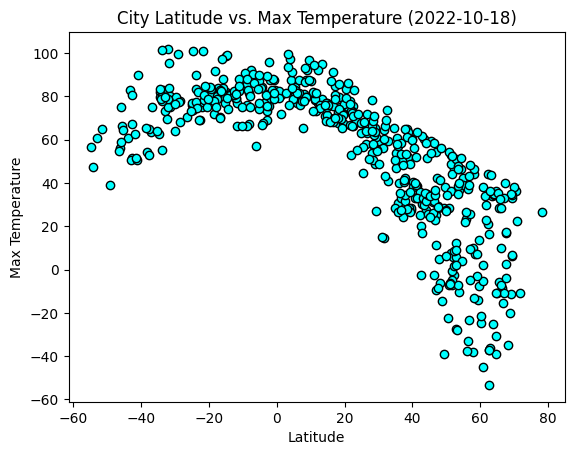

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']
plt.scatter(latitude, temperature, marker = 'o', facecolors = 'cyan', edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

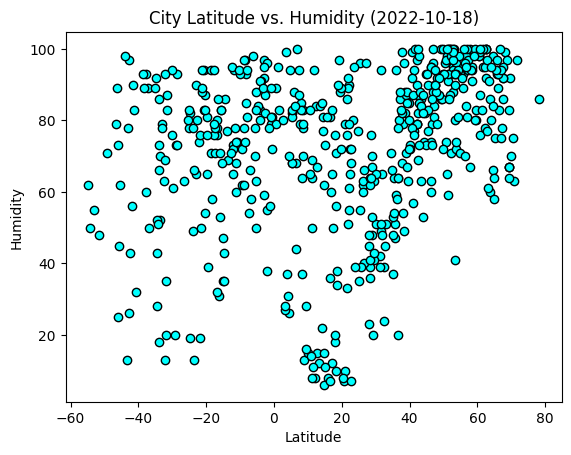

In [9]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity']
plt.scatter(latitude, humidity, marker = 'o', facecolors = 'cyan', edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

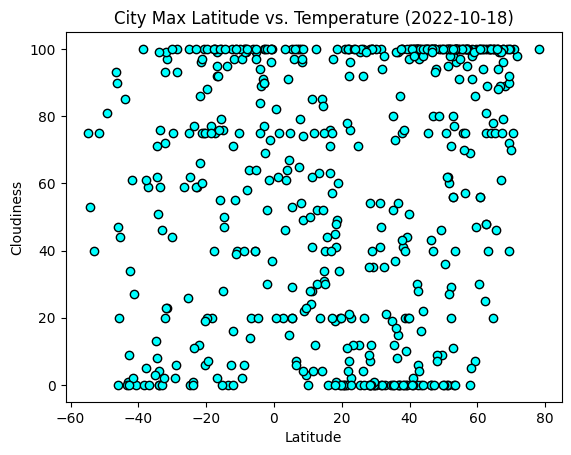

In [10]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']
plt.scatter(latitude, cloudiness, marker = 'o', facecolors = 'cyan', edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

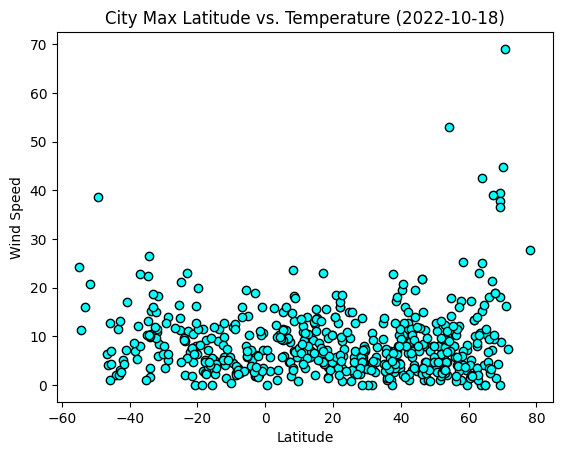

In [11]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df['Wind Speed']
plt.scatter(latitude, wind_speed, marker = 'o', facecolors = 'cyan', edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [54]:
# Define a function to create Linear Regression plots
def scatter_plots(x, y, position):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, marker = 'o', facecolors = 'cyan', edgecolors = 'black')
    plt.plot(x, regress_values, "r-")
    plt.xlabel('Latitude')
    plt.annotate(line_eq, position, fontsize = 12, color = 'r')


In [55]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat'] >= 0), :])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,narasannapeta,18.4167,84.0500,69.71,71,41,1.61,IN,1706545845
5,rikaze,29.2500,88.8833,27.27,20,35,4.50,CN,1706545845
6,klyuchi,52.2667,79.1667,-2.60,98,29,6.11,RU,1706545845
7,georgetown,5.4112,100.3354,84.15,82,20,5.99,MY,1706545846
14,ust'-ordynskiy,52.8050,104.7508,-27.67,95,11,6.13,RU,1706545847


In [56]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat'] <= 0), :])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port macquarie,-31.4333,152.9167,74.89,87,97,8.39,AU,1706545844
1,uturoa,-16.7333,-151.4333,82.78,76,92,3.06,PF,1706545844
3,kununurra,-15.7667,128.7333,82.38,83,79,0.00,AU,1706545845
4,new norfolk,-42.7826,147.0587,51.71,97,9,2.98,AU,1706545845
8,waitangi,-43.9535,-176.5597,60.82,98,85,1.99,NZ,1706545846


###  Temperature vs. Latitude Linear Regression Plot

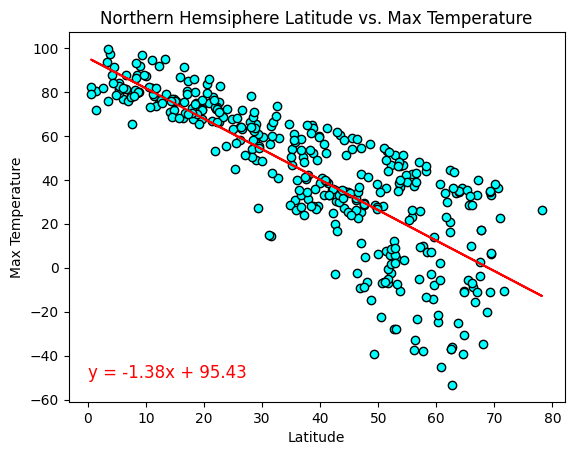

In [93]:
# Linear regression on Northern Hemisphere
northern_latitude = northern_hemi_df['Lat']
northern_temperature = northern_hemi_df['Max Temp']

scatter_plots(northern_latitude, northern_temperature, (0, -50))
plt.ylabel('Max Temperature')
plt.title('Northern Hemsiphere Latitude vs. Max Temperature')
plt.show()

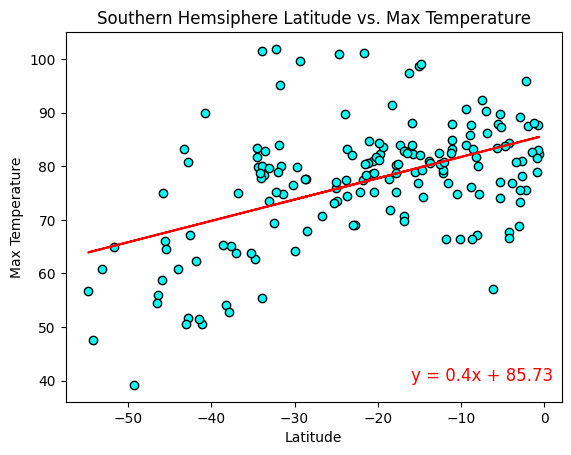

In [92]:
# Linear regression on Southern Hemisphere
southern_latitude = southern_hemi_df['Lat']
southern_temperature = southern_hemi_df['Max Temp']

scatter_plots(southern_latitude, southern_temperature, (-16, 40))
plt.ylabel('Max Temperature')
plt.title('Southern Hemsiphere Latitude vs. Max Temperature')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

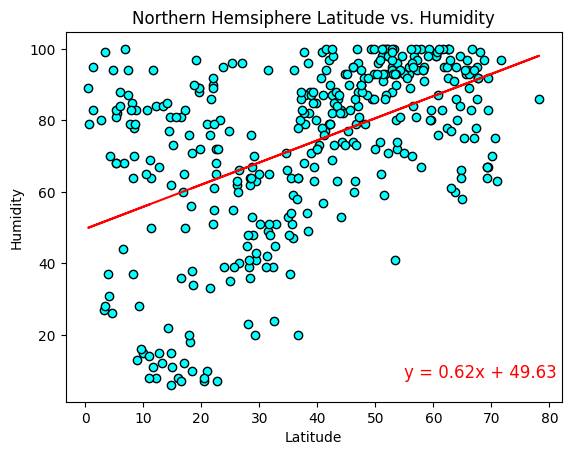

In [94]:
# Northern Hemisphere
northern_humidity = northern_hemi_df['Humidity']

scatter_plots(northern_latitude, northern_humidity, (55, 8))
plt.ylabel('Humidity')
plt.title('Northern Hemsiphere Latitude vs. Humidity')
plt.show()

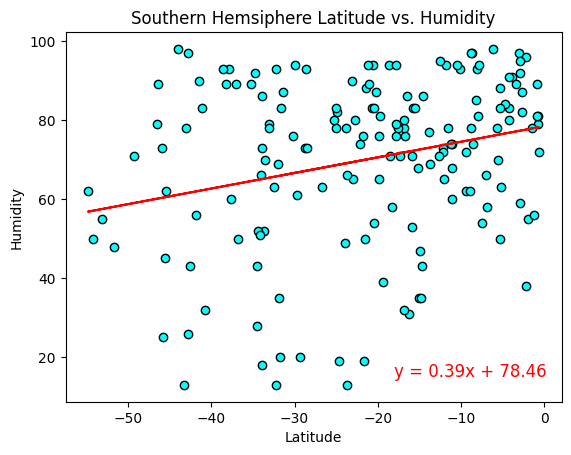

In [96]:
# Southern Hemisphere
southern_humidity = southern_hemi_df['Humidity']

scatter_plots(southern_latitude, southern_humidity, (-18, 15))
plt.ylabel('Humidity')
plt.title('Southern Hemsiphere Latitude vs. Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

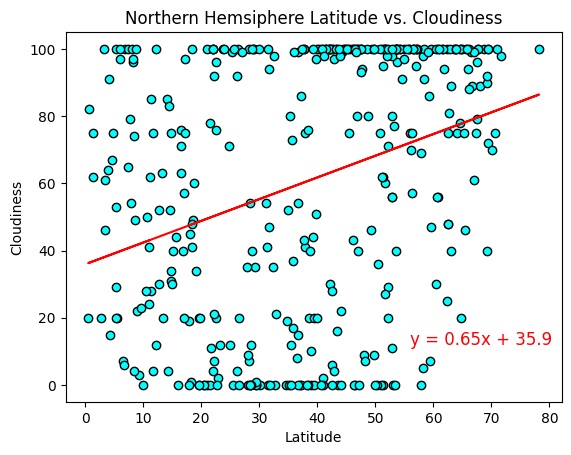

In [99]:
# Northern Hemisphere
northern_cloudiness = northern_hemi_df['Cloudiness']

scatter_plots(northern_latitude, northern_cloudiness, (56, 12))
plt.ylabel('Cloudiness')
plt.title('Northern Hemsiphere Latitude vs. Cloudiness')
plt.show()

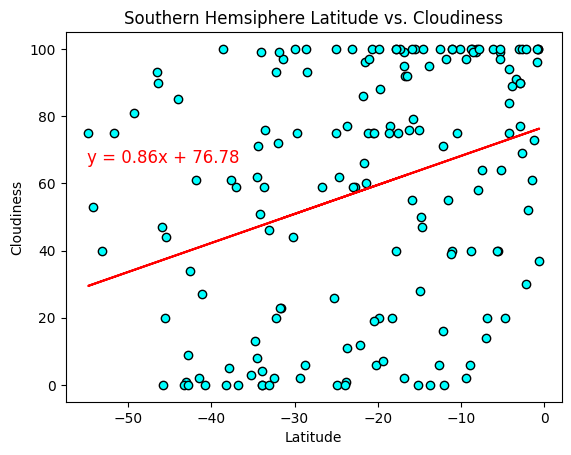

In [100]:
# Southern Hemisphere
southern_cloudiness = southern_hemi_df['Cloudiness']

scatter_plots(southern_latitude, southern_cloudiness, (-55, 66))
plt.ylabel('Cloudiness')
plt.title('Southern Hemsiphere Latitude vs. Cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

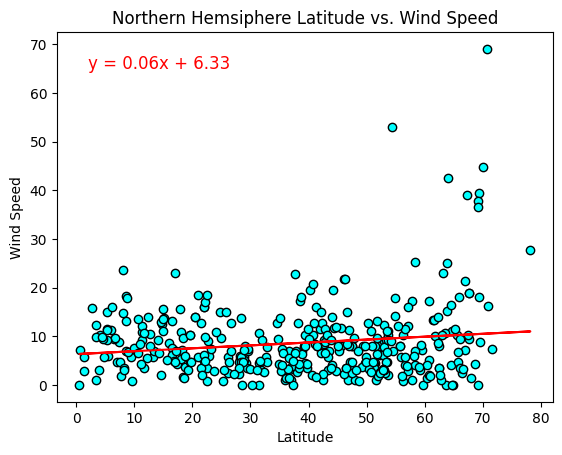

In [102]:
# Northern Hemisphere
northern_wind_speed = northern_hemi_df['Wind Speed']

scatter_plots(northern_latitude, northern_wind_speed, (2, 65))
plt.ylabel('Wind Speed')
plt.title('Northern Hemsiphere Latitude vs. Wind Speed')
plt.show()

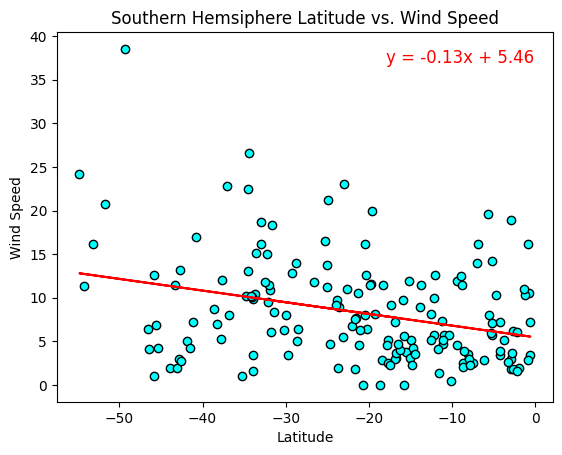

In [106]:
# Southern Hemisphere
southern_wind_speed = southern_hemi_df['Wind Speed']

scatter_plots(southern_latitude, southern_wind_speed, (-18, 37))
plt.ylabel('Wind Speed')
plt.title('Southern Hemsiphere Latitude vs. Wind Speed')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE